<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/M5ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Quick Look at the two property datasets

In [ ]:
# Read in the data sets
dataset = pd.read_csv('/content/Datasetv2.csv')
property_dataset = pd.read_csv('/content/Property data  raw 2.csv')

<ipython-input-2-bc94816c3396>:2: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/Datasetv2.csv')


Quick look at the dataset provided by Centaline Properties (essentially a list of 156,000 property transactions in Hong Kong over a period of 3 years)

In [ ]:
dataset.head(20)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,Phase,Block,Rental,Public Housing,floor
0,0,9/3/2023,"The Long Beach, Tower 7, Middle Floor, Flat D",33000,--,816,40,Kowloon Kowloon City District,7,D,NaN,NaN,True,False,13.0
1,1,9/3/2023,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",15800,--,375,42,Kowloon Kowloon City District,3,H,NaN,NaN,True,False,22.0
2,2,8/3/2023,"Sky Tower, Block 1, Lower Floor, Flat B",18800,--,520,36,Kowloon Kowloon City District,NaN,B,NaN,1,True,False,7.0
3,3,8/3/2023,"Hampton Place, Tower 2, Upper Floor, Flat F",17000,--,429,40,Kowloon Kowloon City District,2,F,NaN,NaN,True,False,22.0
4,4,8/3/2023,"Skypark, Upper Floor, Flat A5",18000,--,407,44,Kowloon Kowloon City District,NaN,A,NaN,NaN,True,False,22.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108242 entries, 0 to 108241
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           108242 non-null  int64  
 1   date                 108242 non-null  object 
 2   address              108242 non-null  object 
 3   price                108242 non-null  int64  
 4   changes              108242 non-null  object 
 5   saleable_area(ft^2)  108242 non-null  object 
 6   unit_rate            108242 non-null  int64  
 7   district             108242 non-null  object 
 8   Tower                44459 non-null   object 
 9   Flat                 103168 non-null  object 
 10  Phase                33987 non-null   object 
 11  Block                36848 non-null   object 
 12  Rental               108241 non-null  object 
 13  Public Housing       108241 non-null  object 
 14  floor                108241 non-null  float64
dtypes: float64(1), in

Quick look at the macro economic indicies dataset which contains indicators that could impact the change in property prices. The information is based on statistics provided by the Government of Hong Kong

In [ ]:
# Create a dictionary of descriptions
descriptions = {
    'CPI': 'Consumer Price Index',
    'IR': 'Interest Rate',
    'MW': 'Monthly Wage',
    'M3': 'Money Supply M3',
    'SD': 'Savings Deposit',
    'UR': 'Unemployment Rate',
    'GDP': 'Gross Domestic Product',
    'CI': 'Consumer Confidence Index',
    'SM': 'Stock Market',
    'LTV': 'Loan to Value',
    'HS': 'Housing Starts',
    'SOLD': 'Number of Properties Sold',
    'PG': 'Population Growth',
    'CG': 'China Growth',
    'PI': 'Property Index'
}

# Map /add descriptions to the dataset_datasetFrame
property_dataset['Description'] = property_dataset['Unnamed: 0'].map(descriptions)

# Display the updated dataset_datasetFrame
property_dataset.head(20)

,Unnamed: 0,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,Description
0,CPI,0.80,0.80,0.80,0.80,0.90,0.90,0.90,0.90,1.80,1.80,1.80,1.80,2.00,2.00,2.00,2.00,Consumer Price Index
1,IR,2.00,0.86,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,2.00,3.50,4.75,5.50,5.75,5.75,Interest Rate
2,MW,17.00,17.00,17.10,16.90,16.80,17.00,17.20,17.20,17.10,17.30,17.50,17.60,17.70,18.00,18.30,18.40,Monthly Wage
3,M3,14.80,14.90,15.90,15.60,15.90,16.00,16.00,16.20,16.50,16.30,16.30,16.40,16.50,16.50,16.80,17.10,Money Supply M3
4,SD,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.08,0.08,0.08,0.08,0.08,Savings Deposit
5,UR,3.70,5.90,6.20,6.20,7.20,6.00,4.60,4.10,4.50,5.10,4.10,3.70,3.30,3.00,2.90,2.90,Unemployment Rate
6,GDP,86.24,86.24,86.24,86.24,92.23,92.23,92.23,92.23,89.96,89.96,89.96,89.96,91.40,91.40,91.40,91.40,Gross Domestic Product
7,CI,62.90,52.30,59.80,63.80,66.60,66.80,68.00,63.40,50.60,53.70,43.90,28.30,66.10,61.00,52.60,51.00,Consumer Confidence Index
8,SM,27.90,24.20,25.10,26.50,28.90,29.10,24.80,23.99,21.91,20.72,17.75,19.90,20.58,19.45,17.95,17.45,Stock Market
9,LTV,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,Loan to Value


In [ ]:
property_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   15 non-null     object 
 1   2020Q1       15 non-null     float64
 2   2020Q2       15 non-null     float64
 3   2020Q3       15 non-null     float64
 4   2020Q4       15 non-null     float64
 5   2021Q1       15 non-null     float64
 6   2021Q2       15 non-null     float64
 7   2021Q3       15 non-null     float64
 8   2021Q4       15 non-null     float64
 9   2022Q1       15 non-null     float64
 10  2022Q2       15 non-null     float64
 11  2022Q3       15 non-null     float64
 12  2022Q4       15 non-null     float64
 13  2023Q1       15 non-null     float64
 14  2023Q2       15 non-null     float64
 15  2023Q3       15 non-null     float64
 16  2023Q4       15 non-null     float64
 17  Description  15 non-null     object 
dtypes: float64(16), object(2)
memory usage: 2.2+ KB


# Merge both datasets and switch around columns of the macro econmic indicies dataset

In [ ]:
# Merger dataset and pivot row and columns of peoperty dataset
# Define the function to convert date to year-quarter format
def get_year_quarter(date_str):
    date_formats = ['%d-%m-%y', '%d/%m/%y', '%Y-%m-%d', '%m/%d/%y', '%d.%m.%Y', '%d-%m-%Y', '%d/%m/%Y']
    for fmt in date_formats:
        try:
            date = datetime.strptime(date_str, fmt)
            year = date.year
            quarter = (date.month - 1) // 3 + 1
            return date.strftime('%d-%m-%y'), f"{year}Q{quarter}"
        except ValueError:
            continue
    raise ValueError(f"Date format not recognized: {date_str}")

# Extract date and quarter info from the dataset
dataset[['date', 'YearQuarter']] = dataset['date'].apply(lambda x: pd.Series(get_year_quarter(x)))

# Melt the property data to have a long format
property_dataset_melted = property_dataset.melt(id_vars=[property_dataset.columns[0]], var_name='YearQuarter', value_name='Value')

# Pivot the melted property data to have a wide format
property_dataset_pivoted = property_dataset_melted.pivot(index='YearQuarter', columns=property_dataset.columns[0], values='Value').reset_index()

# Merge the datasets on the YearQuarter column
merged_dataset = pd.merge(dataset, property_dataset_pivoted, on='YearQuarter', how='left')

# Add quarter info in a new column
merged_dataset['Quarter'] = merged_dataset['YearQuarter'].apply(lambda x: x.split('Q')[1])

# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Merged_Datasetv2.csv', index=False)

In [ ]:
merged_dataset['YearQuarter'].unique()

array(['2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4',
       '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2',
       '2020Q1'], dtype=object)

# Quick look at the merged dataset

In [ ]:
merged_dataset.head(50)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,...,LTV,M3,MW,PG,PI,SD,SM,SOLD,UR,Quarter
0,0,09-03-23,"The Long Beach, Tower 7, Middle Floor, Flat D",33000,--,816,40,Kowloon Kowloon City District,7,D,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
1,1,09-03-23,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",15800,--,375,42,Kowloon Kowloon City District,3,H,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
2,2,08-03-23,"Sky Tower, Block 1, Lower Floor, Flat B",18800,--,520,36,Kowloon Kowloon City District,NaN,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
3,3,08-03-23,"Hampton Place, Tower 2, Upper Floor, Flat F",17000,--,429,40,Kowloon Kowloon City District,2,F,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
4,4,08-03-23,"Skypark, Upper Floor, Flat A5",18000,--,407,44,Kowloon Kowloon City District,NaN,A,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
5,5,08-03-23,"Eltanin Square Mile, Tower 1, Upper Floor, Flat G",14300,--,255,56,Kowloon Kowloon City District,1,G,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
6,6,08-03-23,"Cetus Square Mile, Tower 1, Lower Floor, Flat G",12000,--,194,62,Kowloon Kowloon City District,1,G,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
7,7,08-03-23,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
8,8,08-03-23,"Metro Harbour View, Phase 1, Tower 3, Upper Fl...",16000,--,386,41,Kowloon Kowloon City District,3,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
9,9,08-03-23,"Celestial Heights, Phase 2, 22 Celestial Avenu...",38000,--,"1,155",33,Kowloon Kowloon City District,NaN,NaN,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1


In [ ]:
# Calculate the number of null values for each column
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
Unnamed: 0                 0
date                       0
address                    0
price                      0
changes                    0
saleable_area(ft^2)        0
unit_rate                  0
district                   0
Tower                  63783
Flat                    5074
Phase                  74255
Block                  71394
Rental                     1
Public Housing             1
floor                      1
YearQuarter                0
CG                         0
CI                         0
CPI                        0
GDP                        0
HS                         0
IR                         0
LTV                        0
M3                         0
MW                         0
PG                         0
PI                         0
SD                         0
SM                         0
SOLD                       0
UR                         0
Quarter                    0
dtype: int64


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108242 entries, 0 to 108241
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           108242 non-null  int64  
 1   date                 108242 non-null  object 
 2   address              108242 non-null  object 
 3   price                108242 non-null  int64  
 4   changes              108242 non-null  object 
 5   saleable_area(ft^2)  108242 non-null  object 
 6   unit_rate            108242 non-null  int64  
 7   district             108242 non-null  object 
 8   Tower                44459 non-null   object 
 9   Flat                 103168 non-null  object 
 10  Phase                33987 non-null   object 
 11  Block                36848 non-null   object 
 12  Rental               108241 non-null  object 
 13  Public Housing       108241 non-null  object 
 14  floor                108241 non-null  float64
 15  YearQuarter      

In [ ]:
# Calculate the number of null values for each column
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
Unnamed: 0                 0
date                       0
address                    0
price                      0
changes                    0
saleable_area(ft^2)        0
unit_rate                  0
district                   0
Tower                  63783
Flat                    5074
Phase                  74255
Block                  71394
Rental                     1
Public Housing             1
floor                      1
YearQuarter                0
CG                         0
CI                         0
CPI                        0
GDP                        0
HS                         0
IR                         0
LTV                        0
M3                         0
MW                         0
PG                         0
PI                         0
SD                         0
SM                         0
SOLD                       0
UR                         0
Quarter                    0
dtype: int64


# Considering merged_dataset and see which data is going to be useful for later analysis

In [ ]:
# Need to one hot encode district areas for later analysis
print("Contents of the 'district' column:")
print(merged_dataset['district'])

Contents of the 'district' column:
0         Kowloon Kowloon City District
1         Kowloon Kowloon City District
2         Kowloon Kowloon City District
3         Kowloon Kowloon City District
4         Kowloon Kowloon City District
                      ...              
108237               Yuen Long District
108238               Yuen Long District
108239               Yuen Long District
108240               Yuen Long District
108241                  Yuen Long Distr
Name: district, Length: 108242, dtype: object


In [ ]:
merged_dataset['district'].unique()

array(['Kowloon Kowloon City District', 'Kowloon Kwun Tong District',
       'Kowloon Yau Tsim Mong District', 'Kowloon Wong Tai Sin District',
       'Kowloon Sham Shui Po District',
       'New Territories East Sha Tin District',
       'New Territories East Long Ping Estate',
       'New Territories East North District',
       'New Territories East Tai Po District', 'Kwai Tsing District',
       'Tsuen Wan District', 'Yuen Long District', 'Yuen Long Distr'],
      dtype=object)

In [ ]:
# District (location) will be important in determining property prices
# One Hot encode the districts so they can be used for further analysis
one_hot_encoded = pd.get_dummies(merged_dataset['district'], prefix='district')
unique_districts = merged_dataset['district'].unique()
label_mapping = {district: i+1 for i, district in enumerate(unique_districts)}
merged_dataset['district_encoded'] = merged_dataset['district'].map(label_mapping)

In [ ]:
# Check district types
change_indices = merged_dataset['district'].ne(merged_dataset['district'].shift())
print("Rows where the 'district' value changes:")
print(merged_dataset.loc[change_indices, 'district'])

Rows where the 'district' value changes:
0                 Kowloon Kowloon City District
9529                 Kowloon Kwun Tong District
19051            Kowloon Yau Tsim Mong District
28560             Kowloon Wong Tai Sin District
38040             Kowloon Sham Shui Po District
47563     New Territories East Sha Tin District
56718     New Territories East Long Ping Estate
65805       New Territories East North District
75362      New Territories East Tai Po District
84914                       Kwai Tsing District
92191                        Tsuen Wan District
100407                       Yuen Long District
108241                          Yuen Long Distr
Name: district, dtype: object


In [ ]:
merged_dataset['district_encoded'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
print(merged_dataset)

        Unnamed: 0      date  \
0                0  09-03-23   
1                1  09-03-23   
2                2  08-03-23   
3                3  08-03-23   
4                4  08-03-23   
...            ...       ...   
108237      116116  07-12-21   
108238      116117  07-12-21   
108239      116118  07-12-21   
108240      116119  07-12-21   
108241      116120  07-12-21   

                                                  address    price changes  \
0           The Long Beach, Tower 7, Middle Floor, Flat D    33000      --   
1           One Kai Tak, II, Tower 3, Upper Floor, Flat H    15800      --   
2                 Sky Tower, Block 1, Lower Floor, Flat B    18800      --   
3             Hampton Place, Tower 2, Upper Floor, Flat F    17000      --   
4                           Skypark, Upper Floor, Flat A5    18000      --   
...                                                   ...      ...     ...   
108237  Wetland Seasons Bay, Phase 2, Tower 1B, 8/F, F...  7090000   

In [ ]:
# The exercise is about sales prices of properties and not rental costs
# The database contains both so need to drop/delete the rental data
# Delete rental properties from the merged_dataset
merged_dataset = merged_dataset[merged_dataset['Rental'] != True]
print (merged_dataset)

        Unnamed: 0      date  \
7                7  08-03-23   
13              13  08-03-23   
14              14  08-03-23   
15              15  08-03-23   
16              16  08-03-23   
...            ...       ...   
108237      116116  07-12-21   
108238      116117  07-12-21   
108239      116118  07-12-21   
108240      116119  07-12-21   
108241      116120  07-12-21   

                                                  address     price changes  \
7       Metro Harbour View, Phase 2, Tower 10, Upper F...   6680000      --   
13      One Beacon Hill, Phase 1, Tower 3, Lower Floor...  76000000      --   
14      Whampoa Garden, Phase 7 Cotton Tree Mansions, ...  12070000      --   
15                        Cheong Fu Mansion, 12/F, Flat B   4400000      --   
16                       Sky Tower, Block 3, 29/F, Flat B   8600000      --   
...                                                   ...       ...     ...   
108237  Wetland Seasons Bay, Phase 2, Tower 1B, 8/F, F...   70

In [ ]:
# The exercise is about sales of private residential property so nned to delete public housing
# Delete public housing properties from the merged_dataset
merged_dataset = merged_dataset[merged_dataset['Public Housing'] != True]
print (merged_dataset)

        Unnamed: 0      date  \
7                7  08-03-23   
13              13  08-03-23   
14              14  08-03-23   
15              15  08-03-23   
16              16  08-03-23   
...            ...       ...   
108237      116116  07-12-21   
108238      116117  07-12-21   
108239      116118  07-12-21   
108240      116119  07-12-21   
108241      116120  07-12-21   

                                                  address     price changes  \
7       Metro Harbour View, Phase 2, Tower 10, Upper F...   6680000      --   
13      One Beacon Hill, Phase 1, Tower 3, Lower Floor...  76000000      --   
14      Whampoa Garden, Phase 7 Cotton Tree Mansions, ...  12070000      --   
15                        Cheong Fu Mansion, 12/F, Flat B   4400000      --   
16                       Sky Tower, Block 3, 29/F, Flat B   8600000      --   
...                                                   ...       ...     ...   
108237  Wetland Seasons Bay, Phase 2, Tower 1B, 8/F, F...   70

In [ ]:
# Calculate the number of null values for each column
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
Unnamed: 0                 0
date                       0
address                    0
price                      0
changes                    0
saleable_area(ft^2)        0
unit_rate                  0
district                   0
Tower                  48228
Flat                    4487
Phase                  53378
Block                  49469
Rental                     1
Public Housing             1
floor                      1
YearQuarter                0
CG                         0
CI                         0
CPI                        0
GDP                        0
HS                         0
IR                         0
LTV                        0
M3                         0
MW                         0
PG                         0
PI                         0
SD                         0
SM                         0
SOLD                       0
UR                         0
Quarter                    0
district_encoded           0
dtyp

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75567 entries, 7 to 108241
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           75567 non-null  int64  
 1   date                 75567 non-null  object 
 2   address              75567 non-null  object 
 3   price                75567 non-null  int64  
 4   changes              75567 non-null  object 
 5   saleable_area(ft^2)  75567 non-null  object 
 6   unit_rate            75567 non-null  int64  
 7   district             75567 non-null  object 
 8   Tower                27339 non-null  object 
 9   Flat                 71080 non-null  object 
 10  Phase                22189 non-null  object 
 11  Block                26098 non-null  object 
 12  Rental               75566 non-null  object 
 13  Public Housing       75566 non-null  object 
 14  floor                75566 non-null  float64
 15  YearQuarter          75567 non-null  obj

In [ ]:
# Price is wrong so recalculate the price based on saleable area x unit rate
# First convert saleable area (object) to a float

# Identify and display non-numeric values
non_numeric_values = merged_dataset[~merged_dataset['saleable_area(ft^2)'].str.replace('.', '', 1).str.isdigit()]
print("Non-Numeric Values Before Cleaning")
print(non_numeric_values)

# Clean the dataset_dataset
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].str.replace(',', '')  # Remove commas
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].str.extract('(\d+\.?\d*)')[0]  # Extract numeric part

# Convert to float
merged_dataset['saleable_area(ft^2)'] = pd.to_numeric(merged_dataset['saleable_area(ft^2)'], errors='coerce')

# Display cleaned dataset_dataset types
print("Cleaned dataset_dataset Types")
print(merged_dataset.info())

# Check for remaining null values
print("Number of Null Values After Conversion:", merged_dataset['saleable_area(ft^2)'].isnull().sum())

Non-Numeric Values Before Cleaning
        Unnamed: 0      date  \
13              13  08-03-23   
25              25  08-03-23   
26              26  08-03-23   
64              67  07-03-23   
72              77  07-03-23   
...            ...       ...   
108099      115973  13-12-21   
108118      115993  10-12-21   
108213      116091  07-12-21   
108214      116092  07-12-21   
108218      116096  07-12-21   

                                                  address     price changes  \
13      One Beacon Hill, Phase 1, Tower 3, Lower Floor...  76000000      --   
25      Laguna Verde, Phase 4(4A) Laguna Grande, Tower...  22800000      --   
26      Laguna Verde, Phase 4(4A) Laguna Grande, Tower...  21680000      --   
64                     Kowloon Tong Mansion, 1/F, No. 110  12880000      --   
72                      The Regalia, Tower 5, 1/F, Flat B  20300000      7%   
...                                                   ...       ...     ...   
108099  Fairview Park, Lych

In [ ]:
# Consider dropping unnecessary columns before analysis

# Check columns names
# Get column names as a list
column_names = merged_dataset.columns.tolist()
print(column_names)

['Unnamed: 0', 'date', 'address', 'price', 'changes', 'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat', 'Phase', 'Block', 'Rental', 'Public Housing', 'floor', 'YearQuarter', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR', 'Quarter', 'district_encoded']


In [ ]:
# Calculate the number of null values for each column
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
Unnamed: 0                 0
date                       0
address                    0
price                      0
changes                    0
saleable_area(ft^2)        0
unit_rate                  0
district                   0
Tower                  48228
Flat                    4487
Phase                  53378
Block                  49469
Rental                     1
Public Housing             1
floor                      1
YearQuarter                0
CG                         0
CI                         0
CPI                        0
GDP                        0
HS                         0
IR                         0
LTV                        0
M3                         0
MW                         0
PG                         0
PI                         0
SD                         0
SM                         0
SOLD                       0
UR                         0
Quarter                    0
district_encoded           0
dtyp

In [ ]:
# Using dataset merged_dataset dataset_datasetFrame
# Specify the columns to drop before
columns_to_remove = ['Unnamed: 0', 'date', 'address', 'changes', 'Tower', 'Flat', 'Phase', 'Block', 'Rental', 'Public Housing', 'floor', 'LTV', 'SOLD']

# Find the columns that actually exist in the dataset_datasetFrame
columns_in_merged_dataset = merged_dataset.columns
columns_to_remove_present = [col for col in columns_to_remove if col in columns_in_merged_dataset]

# Remove the specified columns that are present in the dataset_datasetFrame
merged_dataset = merged_dataset.drop(columns=columns_to_remove_present)

# Print the modified dataset_datasetFrame head
print("\nModified dataset_datasetFrame head:")
print(merged_dataset.head())

# Print the modified dataset_datasetFrame
print("\nModified dataset_datasetFrame column info:")
print(merged_dataset.info())


Modified dataset_datasetFrame head:
       price  saleable_area(ft^2)  unit_rate                       district  \
7    6680000                  423      15792  Kowloon Kowloon City District   
13  76000000                 2190      34703  Kowloon Kowloon City District   
14  12070000                  761      15857  Kowloon Kowloon City District   
15   4400000                  320      13717  Kowloon Kowloon City District   
16   8600000                  519      16541  Kowloon Kowloon City District   

   YearQuarter   CG    CI  CPI   GDP      HS    IR    M3    MW   PG     PI  \
7       2023Q1  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24   
13      2023Q1  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24   
14      2023Q1  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24   
15      2023Q1  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24   
16      2023Q1  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24   

      SD     SM   U

In [ ]:
merged_dataset.head()

,price,saleable_area(ft^2),unit_rate,district,YearQuarter,CG,CI,CPI,GDP,HS,IR,M3,MW,PG,PI,SD,SM,UR,Quarter,district_encoded
7,6680000,423,15792,Kowloon Kowloon City District,2023Q1,9.1,66.1,2.0,91.4,5250.0,4.75,16.5,17.7,8.0,-10.24,0.08,20.58,3.3,1,1
13,76000000,2190,34703,Kowloon Kowloon City District,2023Q1,9.1,66.1,2.0,91.4,5250.0,4.75,16.5,17.7,8.0,-10.24,0.08,20.58,3.3,1,1
14,12070000,761,15857,Kowloon Kowloon City District,2023Q1,9.1,66.1,2.0,91.4,5250.0,4.75,16.5,17.7,8.0,-10.24,0.08,20.58,3.3,1,1
15,4400000,320,13717,Kowloon Kowloon City District,2023Q1,9.1,66.1,2.0,91.4,5250.0,4.75,16.5,17.7,8.0,-10.24,0.08,20.58,3.3,1,1
16,8600000,519,16541,Kowloon Kowloon City District,2023Q1,9.1,66.1,2.0,91.4,5250.0,4.75,16.5,17.7,8.0,-10.24,0.08,20.58,3.3,1,1


# Dataset cleaning

In [ ]:
# The existing Price column is not right and rounded so creating a new price column with correct figures

# Add a new 'price' column calculated as 'saleable_area(ft^2)' * 'unit_rate'
merged_dataset['new_price'] = merged_dataset['saleable_area(ft^2)'] * merged_dataset['unit_rate']

# Print the first 100 rows of the dataset_datasetFrame
print("First 20 rows of the dataset_datasetFrame with the new 'price' column:")
print(merged_dataset.head(100).to_string(index=False))

First 20 rows of the dataset_datasetFrame with the new 'price' column:
   price  saleable_area(ft^2)  unit_rate                      district YearQuarter   CG    CI  CPI   GDP      HS    IR    M3    MW   PG     PI    SD     SM   UR Quarter  district_encoded  new_price
 6680000                  423      15792 Kowloon Kowloon City District      2023Q1  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24  0.08  20.58  3.3       1                 1    6680016
76000000                 2190      34703 Kowloon Kowloon City District      2023Q1  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24  0.08  20.58  3.3       1                 1   75999570
12070000                  761      15857 Kowloon Kowloon City District      2023Q1  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24  0.08  20.58  3.3       1                 1   12067177
 4400000                  320      13717 Kowloon Kowloon City District      2023Q1  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -

In [ ]:
# Drop the old price column from the datset

# Display the dataset_datasetFrame before dropping the column
print("Before Dropping 'price' Column:")
print(merged_dataset)

# Drop the 'price' column
merged_dataset = merged_dataset.drop(columns=['price'])

# Display the dataset_datasetFrame after dropping the column
print("\nAfter Dropping 'price' Column:")
print(merged_dataset)

Before Dropping 'price' Column:
           price  saleable_area(ft^2)  unit_rate  \
7        6680000                  423      15792   
13      76000000                 2190      34703   
14      12070000                  761      15857   
15       4400000                  320      13717   
16       8600000                  519      16541   
...          ...                  ...        ...   
108237   7090000                  441      16085   
108238   7170000                  424      16921   
108239   7260000                  495      14659   
108240   6640000                  427      15539   
108241   5650000                  383      14745   

                             district YearQuarter   CG    CI  CPI    GDP  \
7       Kowloon Kowloon City District      2023Q1  9.1  66.1  2.0   91.4   
13      Kowloon Kowloon City District      2023Q1  9.1  66.1  2.0   91.4   
14      Kowloon Kowloon City District      2023Q1  9.1  66.1  2.0   91.4   
15      Kowloon Kowloon City District  

In [ ]:

# Check the new column names
# Get column names as a list
column_names = merged_dataset.columns.tolist()
print(column_names)

['saleable_area(ft^2)', 'unit_rate', 'district', 'YearQuarter', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'UR', 'Quarter', 'district_encoded', 'new_price']


In [ ]:
# Consider dropping unnecessary columns before analysis

# Check columns names
# Get column names as a list
column_names = merged_dataset.columns.tolist()
print(column_names)

['saleable_area(ft^2)', 'unit_rate', 'district', 'YearQuarter', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'UR', 'Quarter', 'district_encoded', 'new_price']


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75567 entries, 7 to 108241
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   saleable_area(ft^2)  75567 non-null  int64 
 1   unit_rate            75567 non-null  int64 
 2   district             75567 non-null  object
 3   YearQuarter          75567 non-null  object
 4   CG                   75567 non-null  object
 5   CI                   75567 non-null  object
 6   CPI                  75567 non-null  object
 7   GDP                  75567 non-null  object
 8   HS                   75567 non-null  object
 9   IR                   75567 non-null  object
 10  M3                   75567 non-null  object
 11  MW                   75567 non-null  object
 12  PG                   75567 non-null  object
 13  PI                   75567 non-null  object
 14  SD                   75567 non-null  object
 15  SM                   75567 non-null  object
 16  UR      

In [ ]:

# Convert the 'SD' column to float
merged_dataset['SD'] = merged_dataset['SD'].astype(float)

# Verify the change
print(merged_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 75567 entries, 7 to 108241
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   saleable_area(ft^2)  75567 non-null  int64  
 1   unit_rate            75567 non-null  int64  
 2   district             75567 non-null  object 
 3   YearQuarter          75567 non-null  object 
 4   CG                   75567 non-null  object 
 5   CI                   75567 non-null  object 
 6   CPI                  75567 non-null  object 
 7   GDP                  75567 non-null  object 
 8   HS                   75567 non-null  object 
 9   IR                   75567 non-null  object 
 10  M3                   75567 non-null  object 
 11  MW                   75567 non-null  object 
 12  PG                   75567 non-null  object 
 13  PI                   75567 non-null  object 
 14  SD                   75567 non-null  float64
 15  SM                   75567 non-null  obj

# Considering which variables have the greatest correlation with Price Increase

Features in order of importance based on correlation with Price Increaae as the target variable:
MW: -0.88
IR: -0.84
UR: 0.72
CPI: -0.72
SM: 0.63
M3: -0.56
PG: -0.50
CI: 0.49
district_encoded: 0.24
GDP: 0.21
CG: 0.16
HS: -0.11
unit_rate: 0.11
saleable_area(ft^2): -0.01


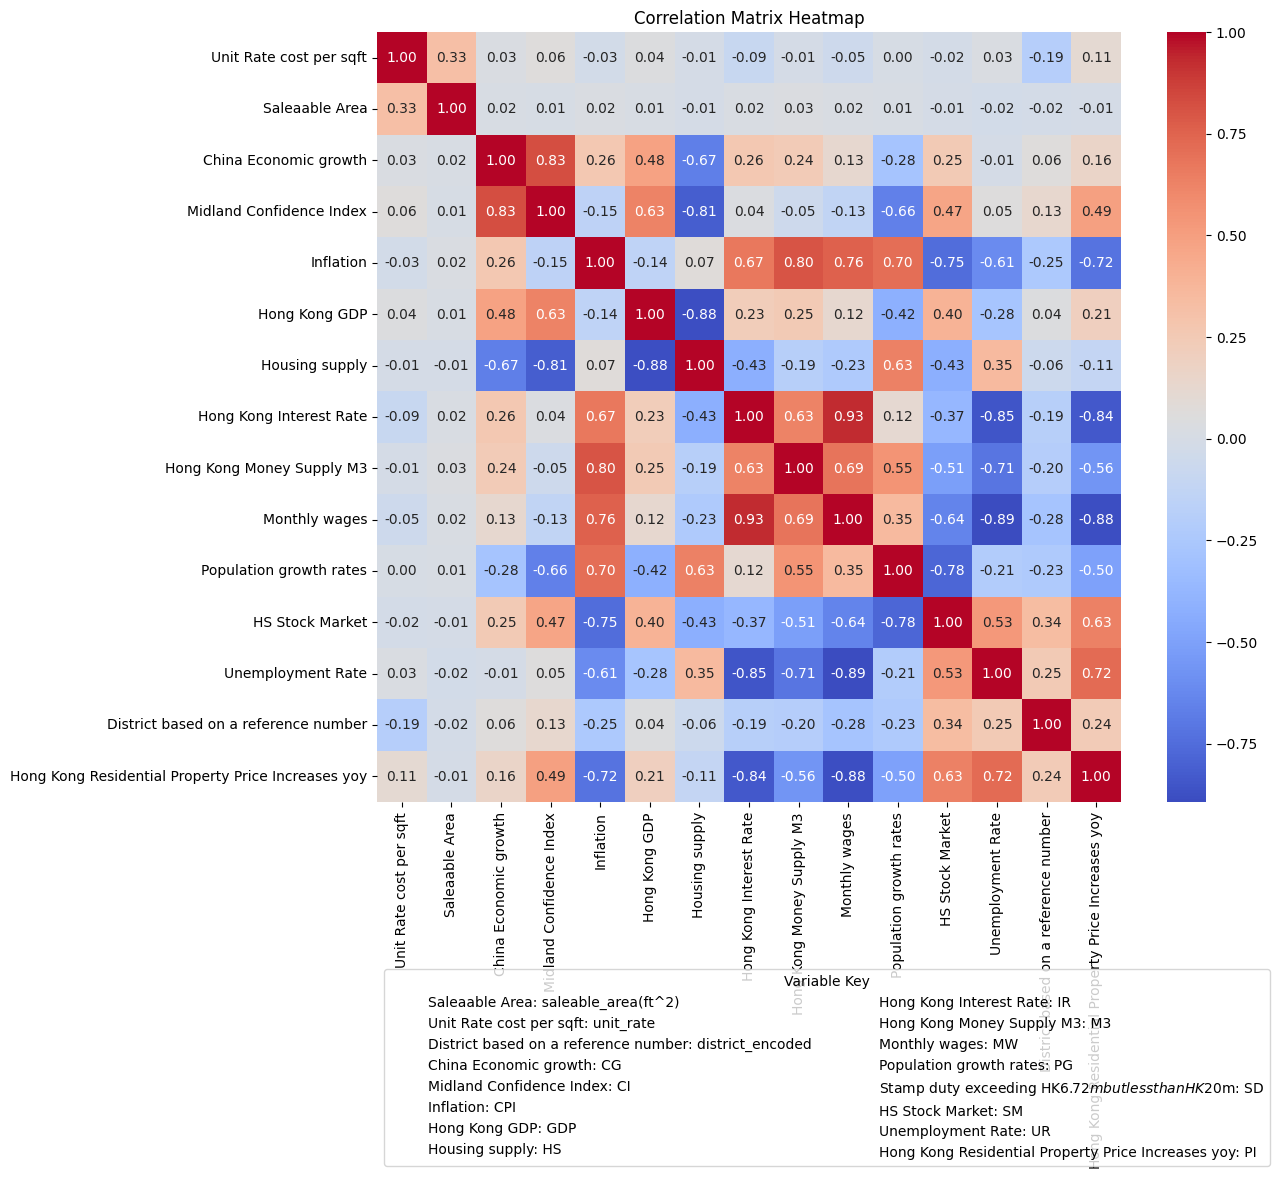

[('MW', -0.8828423115714917),
 ('IR', -0.8394683398587343),
 ('UR', 0.7242533595948616),
 ('CPI', -0.7192200344979127),
 ('SM', 0.6345337309912452),
 ('M3', -0.5635957407156509),
 ('PG', -0.4971157412570883),
 ('CI', 0.4919620917536546),
 ('district_encoded', 0.24378097700720566),
 ('GDP', 0.20713662448493644),
 ('CG', 0.1614638828888352),
 ('HS', -0.11185898544729032),
 ('unit_rate', 0.10856443968855232),
 ('saleable_area(ft^2)', -0.01317982121276904)]

In [ ]:
# Define the feature columns and the target column
features = [
    'unit_rate','saleable_area(ft^2)', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'SM', 'UR', 'district_encoded'
]
target = 'PI'

# Define the mapping of variables to their short forms and descriptions
short_form_mapping = {
    'saleable_area(ft^2)': 'Saleaable Area',
    'unit_rate': 'Unit Rate cost per sqft',
    'district_encoded': 'District based on a reference number',
    'CG': 'China Economic growth',
    'CI': 'Midland Confidence Index',
    'CPI': 'Inflation',
    'GDP': 'Hong Kong GDP',
    'HS': 'Housing supply',
    'IR': 'Hong Kong Interest Rate',
    'M3': 'Hong Kong Money Supply M3',
    'MW': 'Monthly wages',
    'PG': 'Population growth rates',
    'SD': 'Stamp duty exceeding HK$6.72m but less than HK$20m',
    'SM': 'HS Stock Market',
    'UR': 'Unemployment Rate',
    'PI': 'Hong Kong Residential Property Price Increases yoy'
}

# Ensure all required columns are present in the merged_dataset
missing_columns = [col for col in features + [target] if col not in merged_dataset.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the merged_dataset: {missing_columns}")

# Double check and convert all feature columns to numeric, coerce errors to NaN
for col in features:
    merged_dataset[col] = pd.to_numeric(merged_dataset[col], errors='coerce')

# Convert the target column to numeric, coerce errors to NaN
merged_dataset[target] = pd.to_numeric(merged_dataset[target], errors='coerce')

# Handle missing values (if any) by filling them with the mean of the column
X = merged_dataset[features].fillna(merged_dataset[features].mean())
y = merged_dataset[target].fillna(merged_dataset[target].mean())

# Combine features and target for correlation matrix
df_combined = X.copy()
df_combined[target] = y

# Calculate the correlation matrix
corr_matrix = df_combined.corr()

# Extract correlations with the target variable and sort by absolute value
feature_importance = corr_matrix[target].drop(target)
feature_importance = feature_importance.reindex(feature_importance.abs().sort_values(ascending=False).index)

# Convert feature importance to list of tuples
feature_importance_list = [(feature, importance) for feature, importance in feature_importance.items()]

# Print features in order of importance with their correlation values
print("Features in order of importance based on correlation with Price Increaae as the target variable:")
for feature, importance in feature_importance_list:
    print(f"{feature}: {importance:.2f}")

# Rename the columns and index of the correlation matrix for the heatmap
short_labels = {key: short_form for key, short_form in short_form_mapping.items()}
corr_matrix_renamed = corr_matrix.rename(columns=short_labels, index=short_labels)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_renamed, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')

# Add legend for the short forms below the heatmap
handles = [plt.Line2D([0], [0], color='w', label=f'{short_form}: {description}') for description, short_form in short_form_mapping.items()]
plt.figlegend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, title='Variable Key')

plt.show()

# Output the feature importance list
feature_importance_list

The heatmap indicates that Hong Kong residential property price increases from 2020 to 2023 have strong positive correlations with the HS Stock Market Index (0.91) and economic growth (0.79). This suggests that both stock market performance and economic growth are significant drivers of property price increases.

Conversely, there are strong negative correlations with the unemployment rate (-0.87) and inflation (-0.79), indicating that higher unemployment and inflation are associated with lower property price increases.

An anomaly appears in the Midland Confidence Index, which has a lower-than-expected correlation (0.26) with property price increases. This suggests that despite rising property prices, consumer confidence did not increase proportionately, possibly due to other economic uncertainties or external factors affecting consumer sentiment.

Features in order of importance based on correlation with Price as the target variable:
saleable_area(ft^2): 0.78
unit_rate: 0.61
district_encoded: -0.08
SM: -0.02
GDP: 0.02
CI: 0.02
M3: 0.02
UR: -0.02
HS: -0.01
CPI: 0.01
CG: 0.01
PG: 0.01
MW: 0.01
IR: -0.00


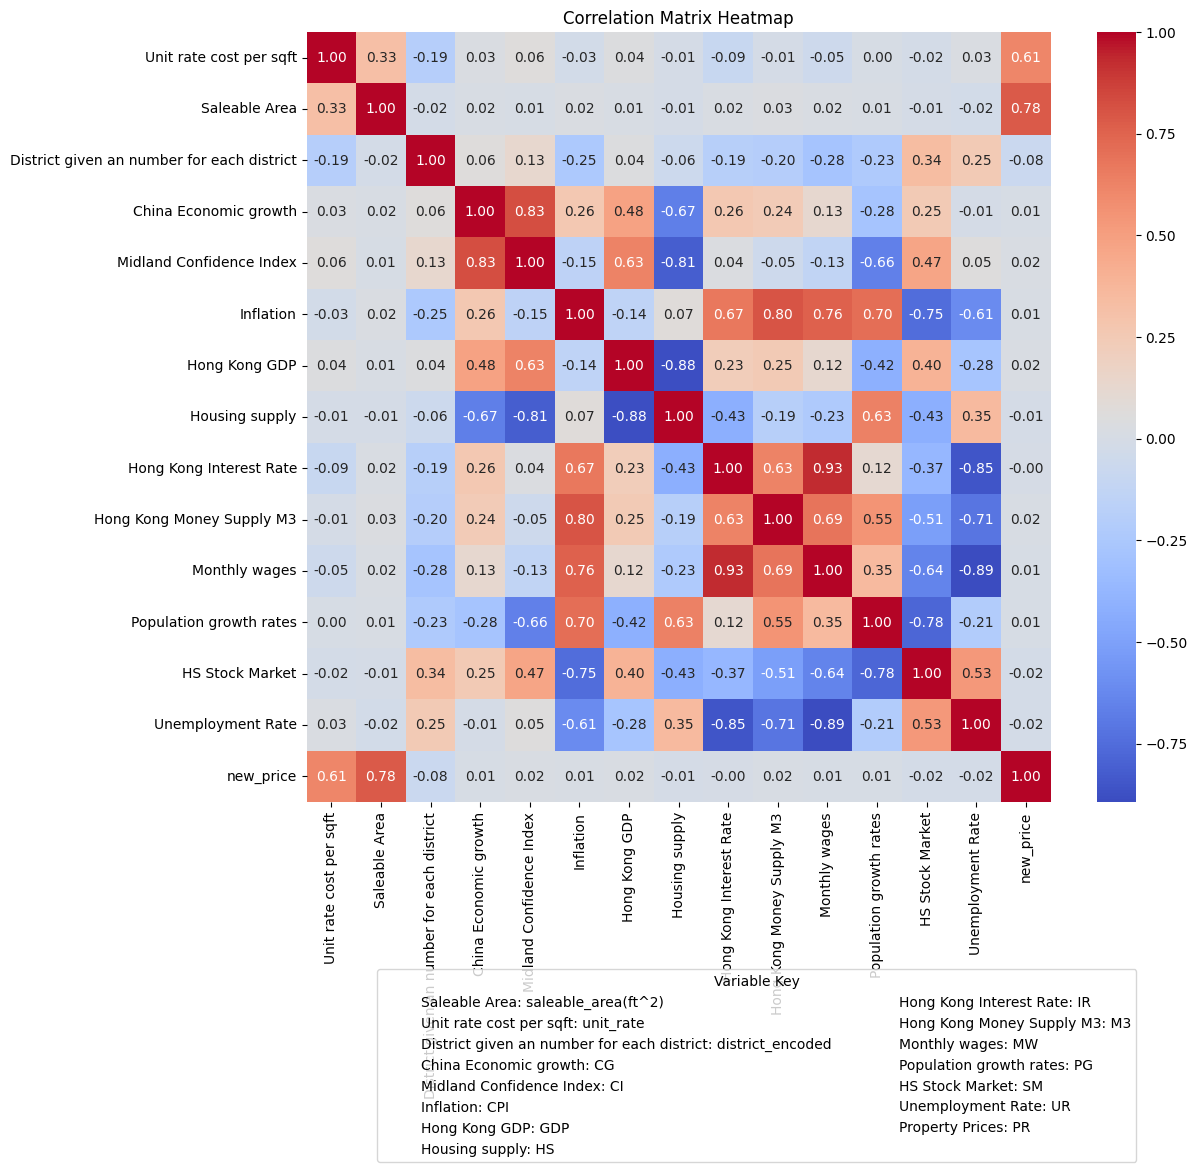

[('saleable_area(ft^2)', 0.7834321462138308),
 ('unit_rate', 0.6101955264014116),
 ('district_encoded', -0.07852064422314238),
 ('SM', -0.020163686987260364),
 ('GDP', 0.017937362631954272),
 ('CI', 0.016261478560612552),
 ('M3', 0.016060620012212753),
 ('UR', -0.015296719497954137),
 ('HS', -0.01130838040052014),
 ('CPI', 0.009498347854471005),
 ('CG', 0.008035238065262346),
 ('PG', 0.007339995857066441),
 ('MW', 0.007300137606396842),
 ('IR', -0.003026066886498333)]

In [ ]:
# Define the feature columns and the target column
features = [
    'unit_rate', 'saleable_area(ft^2)', 'district_encoded', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'SM', 'UR'
]
target = 'new_price'

# Define the mapping of variables to their short forms and descriptions
short_form_mapping = {
    'saleable_area(ft^2)': 'Saleable Area',
    'unit_rate': 'Unit rate cost per sqft',
    'district_encoded': 'District given an number for each district',
    'CG': 'China Economic growth',
    'CI': 'Midland Confidence Index',
    'CPI': 'Inflation',
    'GDP': 'Hong Kong GDP',
    'HS': 'Housing supply',
    'IR': 'Hong Kong Interest Rate',
    'M3': 'Hong Kong Money Supply M3',
    'MW': 'Monthly wages',
    'PG': 'Population growth rates',
    'SM': 'HS Stock Market',
    'UR': 'Unemployment Rate',
    'PR': 'Property Prices'
}

# Ensure all required columns are present in the merged_dataset
missing_columns = [col for col in features + [target] if col not in merged_dataset.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the merged_dataset: {missing_columns}")

# Convert all feature columns to numeric, coerce errors to NaN
for col in features:
    merged_dataset[col] = pd.to_numeric(merged_dataset[col], errors='coerce')

# Convert the target column to numeric, coerce errors to NaN
merged_dataset[target] = pd.to_numeric(merged_dataset[target], errors='coerce')

# Handle missing values (if any) by filling them with the mean of the column
X = merged_dataset[features].fillna(merged_dataset[features].mean())
y = merged_dataset[target].fillna(merged_dataset[target].mean())

# Combine features and target for correlation matrix
df_combined = X.copy()
df_combined[target] = y

# Calculate the correlation matrix
corr_matrix = df_combined.corr()

# Extract correlations with the target variable and sort by absolute value
feature_importance = corr_matrix[target].drop(target)
feature_importance = feature_importance.reindex(feature_importance.abs().sort_values(ascending=False).index)

# Convert feature importance to list of tuples
feature_importance_list = [(feature, importance) for feature, importance in feature_importance.items()]

# Print features in order of importance with their correlation values
print("Features in order of importance based on correlation with Price as the target variable:")
for feature, importance in feature_importance_list:
    print(f"{feature}: {importance:.2f}")

# Rename the columns and index of the correlation matrix for the heatmap
short_labels = {key: short_form for key, short_form in short_form_mapping.items()}
corr_matrix_renamed = corr_matrix.rename(columns=short_labels, index=short_labels)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_renamed, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')

# Add legend for the short forms below the heatmap
handles = [plt.Line2D([0], [0], color='w', label=f'{short_form}: {description}') for description, short_form in short_form_mapping.items()]
plt.figlegend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, title='Variable Key')

plt.show()

# Output the feature importance list
feature_importance_list

# Correlation in Values (numbers):

In [ ]:
from tabulate import tabulate

# Print features in order of importance with their correlation values
print("Features in order of importance based on correlation with the target variable (price increase):")
for feature, importance in feature_importance_list:
    print(f"{feature}: {importance:.2f}")

# Create and print the variable key as a table, including correlation values
key_table = [
    (short_form_mapping[feature], feature, importance, short_form_mapping[feature])
    for feature, importance in feature_importance_list
]
print("\nCorrelation of Variable against Price Increase")
print(tabulate(key_table, headers=["Description", "Correlation value in order of Importance", "Long Form description of variable"], tablefmt="grid"))

Features in order of importance based on correlation with the target variable (price increase):
saleable_area(ft^2): 0.78
unit_rate: 0.61
district_encoded: -0.08
SM: -0.02
GDP: 0.02
CI: 0.02
M3: 0.02
UR: -0.02
HS: -0.01
CPI: 0.01
CG: 0.01
PG: 0.01
MW: 0.01
IR: -0.00

Correlation of Variable against Price Increase
+--------------------------------------------+---------------------+--------------------------------------------+--------------------------------------------+
|                                            | Description         |   Correlation value in order of Importance | Long Form description of variable          |
+============================================+=====================+============================================+============================================+
| Saleable Area                              | saleable_area(ft^2) |                                 0.783432   | Saleable Area                              |
+--------------------------------------------+---

# District Price Analysis (Area Analysis)

In [ ]:
import pandas as pd

# Assuming merged_dataset is already defined and loaded

# Step 1: Clean the data by removing rows with NaN values in the 'unit_rate' column
cleaned_dataset = merged_dataset.dropna(subset=['unit_rate'])  # Drop rows where 'unit_rate' is NaN

# Assuming the one-hot encoding column for 'district' is named 'district_encoded'

# Step 2: Calculate the mean unit_rate for each district
# Identify the unique encoded districts
encoded_districts = cleaned_dataset['district_encoded'].unique()

# Calculate the average unit_rate for each encoded district
average_unit_rate = cleaned_dataset.groupby('district_encoded').agg({'unit_rate': 'mean'}).reset_index()

# Step 3: Merge the average_unit_rate with the cleaned dataset (one-hot encoded columns)
result_dataset = average_unit_rate.merge(cleaned_dataset, on='district_encoded', how='left')

# Step 4: Display the final table
print("Table of Districts with One-Hot Encoding and Average Unit Rate per Year:")
print(result_dataset)

Table of Districts with One-Hot Encoding and Average Unit Rate per Year:
       district_encoded   unit_rate_x  saleable_area(ft^2)  unit_rate_y  \
0                     1  18073.058350                  423        15792   
1                     1  18073.058350                 2190        34703   
2                     1  18073.058350                  761        15857   
3                     1  18073.058350                  320        13717   
4                     1  18073.058350                  519        16541   
...                 ...           ...                  ...          ...   
75562                12  14595.835717                  441        16085   
75563                12  14595.835717                  424        16921   
75564                12  14595.835717                  495        14659   
75565                12  14595.835717                  427        15539   
75566                13  14745.000000                  383        14745   

                          

In [ ]:
import pandas as pd

# Assuming merged_dataset is already loaded

# Step 1: Clean the data by removing rows with NaN values in the 'unit_rate' column
cleaned_dataset = merged_dataset.dropna(subset=['unit_rate'])  # Drop rows where 'unit_rate' is NaN

# Step 2: Calculate the mean unit_rate for each district
# Group by 'district_encoded' and 'district' and calculate the mean 'unit_rate'
average_unit_rate = cleaned_dataset.groupby(['district_encoded', 'district']).agg({'unit_rate': 'mean'}).reset_index()

# Rename the 'unit_rate' column to 'average_unit_rate' for clarity
average_unit_rate = average_unit_rate.rename(columns={'unit_rate': 'average_unit_rate'})

# Create a DataFrame with all district codes and descriptions
all_districts = merged_dataset[['district_encoded', 'district']].drop_duplicates().reset_index(drop=True)

# Merge the average unit rate with all districts to ensure all districts are included
final_table = pd.merge(all_districts, average_unit_rate, on=['district_encoded', 'district'], how='left')

# Fill NaN values in 'average_unit_rate' with a placeholder value (e.g., 0 or 'N/A')
final_table['average_unit_rate'] = final_table['average_unit_rate'].fillna('N/A')

# Step 3: Display the final table
print("Table of Districts with One-Hot Encoding, District, and Average Unit Rate per Year:")
print(final_table)

Table of Districts with One-Hot Encoding, District, and Average Unit Rate per Year:
    district_encoded                               district  average_unit_rate
0                  1          Kowloon Kowloon City District       18073.058350
1                  2             Kowloon Kwun Tong District       15462.839018
2                  3         Kowloon Yau Tsim Mong District       19410.405652
3                  4          Kowloon Wong Tai Sin District       16345.284921
4                  5          Kowloon Sham Shui Po District       16993.249811
5                  6  New Territories East Sha Tin District       15757.109088
6                  7  New Territories East Long Ping Estate       16238.593147
7                  8    New Territories East North District       15060.452633
8                  9   New Territories East Tai Po District       14851.438245
9                 10                    Kwai Tsing District       13972.931690
10                11                     Tsuen 

In [ ]:
import pandas as pd

# Assuming merged_dataset is already loaded

# Step 1: Extract the year from the 'YearQuarter' column
merged_dataset['year'] = merged_dataset['YearQuarter'].str[:4].astype(int)

# Step 2: Clean the data by removing rows with NaN values in the 'unit_rate' column
cleaned_dataset = merged_dataset.dropna(subset=['unit_rate'])  # Drop rows where 'unit_rate' is NaN

# Step 3: Calculate the mean unit_rate for each district per year
# Group by 'district_encoded', 'district', and 'year' and calculate the mean 'unit_rate'
average_unit_rate_per_year = cleaned_dataset.groupby(['district_encoded', 'district', 'year']).agg({'unit_rate': 'mean'}).reset_index()

# Rename the 'unit_rate' column to 'average_unit_rate' for clarity
average_unit_rate_per_year = average_unit_rate_per_year.rename(columns={'unit_rate': 'average_unit_rate'})

# Manually define all possible districts with their encodings
all_districts = pd.DataFrame({
    'district_encoded': range(1, 19),
    'district': [
        'Kowloon City District', 'Kowloon Kwan Tong District', 'Kowloon Yau Tsim Mong District',
        'Kowloon Wong Tai Sin District', 'Kowloon Sham Shui Po District', 'New Territories East Sha Tin District',
        'New Territories East Long Ping Estate', 'New Territories East North District', 'New Territories East Tai Po District',
        'Kwai Tsing District', 'Tsuen Wan District', 'Yuen Long District', 'Yuen Long District',
        'New Territories West Tuen Mun District', 'New Territories West Yuen Long District',
        'New Territories West Yuen Long District', 'New Territories West Tuen Mun District', 'New Territories West Yuen Long District'
        # Add the remaining district names here if any
    ]
})

# Create a DataFrame with all possible combinations of districts and years
years = merged_dataset['year'].unique()
all_combinations = pd.MultiIndex.from_product([all_districts['district_encoded'], years], names=['district_encoded', 'year']).to_frame(index=False)
all_district_year_combinations = pd.merge(all_combinations, all_districts, on='district_encoded')

# Merge the average unit rate with all district-year combinations to ensure all are included
final_table = pd.merge(all_district_year_combinations, average_unit_rate_per_year, on=['district_encoded', 'district', 'year'], how='left')

# Fill NaN values in 'average_unit_rate' with

<ipython-input-47-cd832cba514f>:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(years))


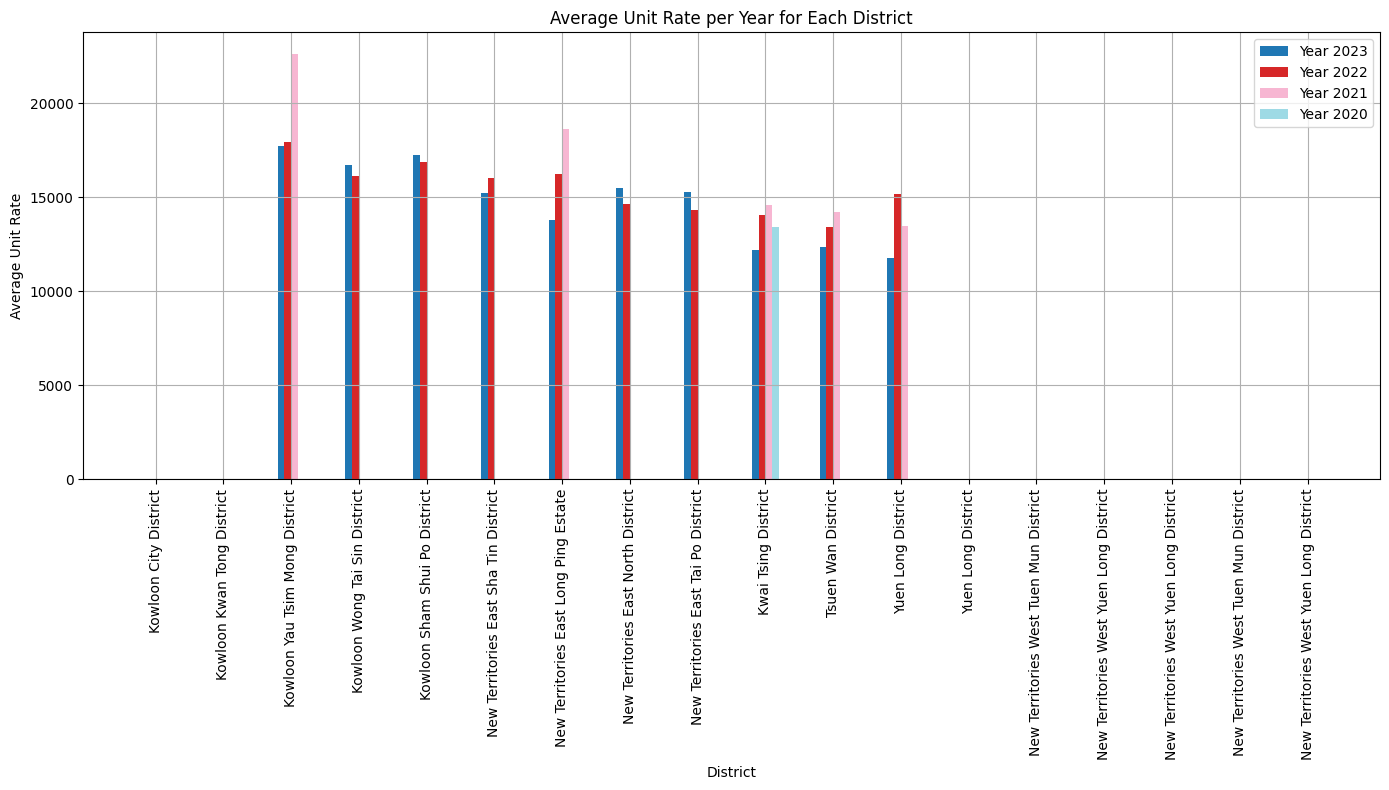

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_dataset is already loaded

# Step 1: Extract the year from the 'YearQuarter' column
merged_dataset['year'] = merged_dataset['YearQuarter'].str[:4].astype(int)

# Step 2: Clean the data by removing rows with NaN values in the 'unit_rate' column
cleaned_dataset = merged_dataset.dropna(subset=['unit_rate'])  # Drop rows where 'unit_rate' is NaN

# Step 3: Calculate the mean unit_rate for each district per year
# Group by 'district_encoded', 'district', and 'year' and calculate the mean 'unit_rate'
average_unit_rate_per_year = cleaned_dataset.groupby(['district_encoded', 'district', 'year']).agg({'unit_rate': 'mean'}).reset_index()

# Rename the 'unit_rate' column to 'average_unit_rate' for clarity
average_unit_rate_per_year = average_unit_rate_per_year.rename(columns={'unit_rate': 'average_unit_rate'})

# Manually define all possible districts with their encodings
all_districts = pd.DataFrame({
    'district_encoded': range(1, 19),
    'district': [
        'Kowloon City District', 'Kowloon Kwan Tong District', 'Kowloon Yau Tsim Mong District',
        'Kowloon Wong Tai Sin District', 'Kowloon Sham Shui Po District', 'New Territories East Sha Tin District',
        'New Territories East Long Ping Estate', 'New Territories East North District', 'New Territories East Tai Po District',
        'Kwai Tsing District', 'Tsuen Wan District', 'Yuen Long District', 'Yuen Long District',
        'New Territories West Tuen Mun District', 'New Territories West Yuen Long District',
        'New Territories West Yuen Long District', 'New Territories West Tuen Mun District', 'New Territories West Yuen Long District'
        # Add the remaining district names here if any
    ]
})

# Create a DataFrame with all possible combinations of districts and years
years = merged_dataset['year'].unique()
all_combinations = pd.MultiIndex.from_product([all_districts['district_encoded'], years], names=['district_encoded', 'year']).to_frame(index=False)
all_district_year_combinations = pd.merge(all_combinations, all_districts, on='district_encoded')

# Merge the average unit rate with all district-year combinations to ensure all are included
final_table = pd.merge(all_district_year_combinations, average_unit_rate_per_year, on=['district_encoded', 'district', 'year'], how='left')

# Fill NaN values in 'average_unit_rate' with a placeholder value (e.g., 0 or 'N/A')
final_table['average_unit_rate'] = final_table['average_unit_rate'].fillna(0)

# Step 4: Plot the data as a bar graph
plt.figure(figsize=(14, 8))

# Generate a color map
colors = plt.cm.get_cmap('tab20', len(years))

# Bar width
bar_width = 0.1

# Positions of the bars on the x-axis
r = np.arange(len(all_districts))

# Loop through each year and plot
for i, year in enumerate(years):
    data_for_year = final_table[final_table['year'] == year]
    plt.bar(r + i * bar_width, data_for_year['average_unit_rate'], width=bar_width, label=f'Year {year}', color=colors(i))

# Set district names as x-ticks
plt.xticks(ticks=r + bar_width * (len(years) - 1) / 2, labels=all_districts['district'], rotation=90)

# Labels and title
plt.xlabel('District')
plt.ylabel('Average Unit Rate')
plt.title('Average Unit Rate per Year for Each District')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust plot to fit labels
plt.show()

<ipython-input-51-d92b781ab87d>:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(years))


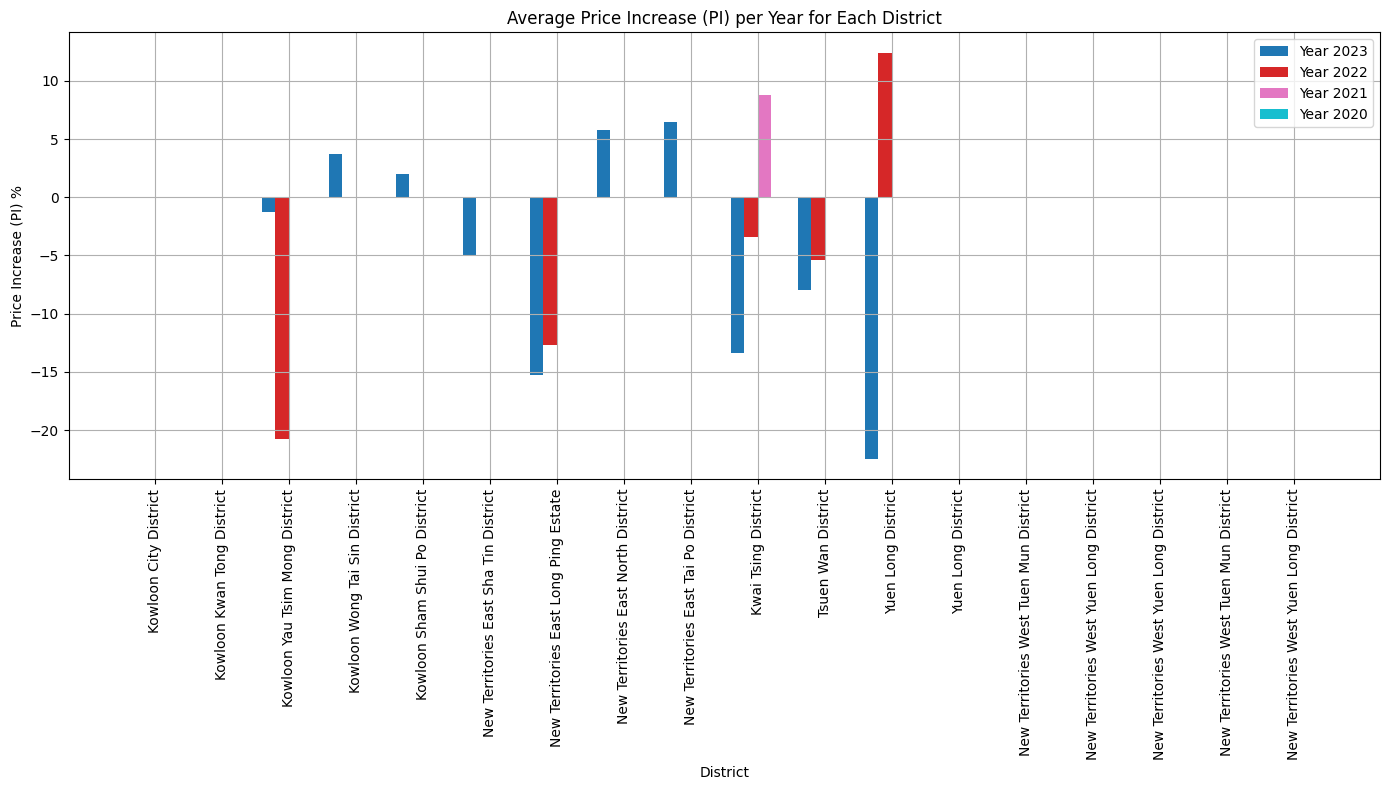

In [ ]:


# Step 1: Extract the year from the 'YearQuarter' column
merged_dataset['year'] = merged_dataset['YearQuarter'].str[:4].astype(int)

# Step 3: Calculate the mean unit_rate for each district per year
# Group by 'district_encoded', 'district', and 'year' and calculate the mean 'unit_rate'
average_unit_rate_per_year = cleaned_dataset.groupby(['district_encoded', 'district', 'year']).agg({'unit_rate': 'mean'}).reset_index()

# Rename the 'unit_rate' column to 'average_unit_rate' for clarity
average_unit_rate_per_year = average_unit_rate_per_year.rename(columns={'unit_rate': 'average_unit_rate'})

# Step 4: Calculate the Price Increase (PI) for each year and district
# Sort the data by district and year
average_unit_rate_per_year = average_unit_rate_per_year.sort_values(by=['district_encoded', 'year'])

# Calculate the year-over-year price increase
average_unit_rate_per_year['PI'] = average_unit_rate_per_year.groupby('district_encoded')['average_unit_rate'].pct_change() * 100

# Fill NaN values in 'PI' with 0 (or another appropriate value)
average_unit_rate_per_year['PI'] = average_unit_rate_per_year['PI'].fillna(0)

# Manually define all possible districts with their encodings
all_districts = pd.DataFrame({
    'district_encoded': range(1, 19),
    'district': [
        'Kowloon City District', 'Kowloon Kwan Tong District', 'Kowloon Yau Tsim Mong District',
        'Kowloon Wong Tai Sin District', 'Kowloon Sham Shui Po District', 'New Territories East Sha Tin District',
        'New Territories East Long Ping Estate', 'New Territories East North District', 'New Territories East Tai Po District',
        'Kwai Tsing District', 'Tsuen Wan District', 'Yuen Long District', 'Yuen Long District',
        'New Territories West Tuen Mun District', 'New Territories West Yuen Long District',
        'New Territories West Yuen Long District', 'New Territories West Tuen Mun District', 'New Territories West Yuen Long District'
        # Add the remaining district names here if any
    ]
})

# Create a DataFrame with all possible combinations of districts and years
years = merged_dataset['year'].unique()
all_combinations = pd.MultiIndex.from_product([all_districts['district_encoded'], years], names=['district_encoded', 'year']).to_frame(index=False)
all_district_year_combinations = pd.merge(all_combinations, all_districts, on='district_encoded')

# Merge the PI with all district-year combinations to ensure all are included
final_table = pd.merge(all_district_year_combinations, average_unit_rate_per_year, on=['district_encoded', 'district', 'year'], how='left')

# Fill NaN values in 'PI' with a placeholder value (e.g., 0 or 'N/A')
final_table['PI'] = final_table['PI'].fillna(0)

# Step 5: Plot the data as a bar graph
plt.figure(figsize=(14, 8))

# Generate a color map with distinct colors
colors = plt.cm.get_cmap('tab10', len(years))

# Increase the bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r = np.arange(len(all_districts))

# Loop through each year and plot
for i, year in enumerate(years):
    data_for_year = final_table[final_table['year'] == year]
    plt.bar(r + i * bar_width, data_for_year['PI'], width=bar_width, label=f'Year {year}', color=colors(i))

# Set district names as x-ticks
plt.xticks(ticks=r + bar_width * (len(years) - 1) / 2, labels=all_districts['district'], rotation=90)

# Labels and title
plt.xlabel('District')
plt.ylabel('Price Increase (PI) %')
plt.title('Average Price Increase (PI) per Year for Each District')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust plot to fit labels
plt.show()

# Decision Tree

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75567 entries, 7 to 108241
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   saleable_area(ft^2)  75567 non-null  int64  
 1   unit_rate            75567 non-null  int64  
 2   district             75567 non-null  object 
 3   YearQuarter          75567 non-null  object 
 4   CG                   75567 non-null  float64
 5   CI                   75567 non-null  float64
 6   CPI                  75567 non-null  float64
 7   GDP                  75567 non-null  float64
 8   HS                   75567 non-null  float64
 9   IR                   75567 non-null  float64
 10  M3                   75567 non-null  float64
 11  MW                   75567 non-null  float64
 12  PG                   75567 non-null  float64
 13  PI                   75567 non-null  float64
 14  SD                   75567 non-null  float64
 15  SM                   75567 non-null  flo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['unit_rate', 'new_price', 'saleable_area(ft^2)', 'district', 'YearQuarter', 'Quarter'])
target_variables = ['unit_rate', 'new_price', 'saleable_area(ft^2)']

# Function to train and evaluate a decision tree model
def train_and_evaluate_decision_tree(X, y, target_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree Regressor
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Results for target variable '{target_name}':")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}\n")

# Iterate through each target variable and train a Decision Tree model
for target in target_variables:
    y = merged_dataset[target]
    train_and_evaluate_decision_tree(features, y, target)

Results for target variable 'unit_rate':
Mean Squared Error (MSE): 36106544.82289893
R-squared (R2): 0.09604533490987877

Results for target variable 'new_price':
Mean Squared Error (MSE): 177076723749731.28
R-squared (R2): 0.012524210374534217

Results for target variable 'saleable_area(ft^2)':
Mean Squared Error (MSE): 96938.45206315603
R-squared (R2): 0.0073813956632508



# Regression Analysis

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75567 entries, 7 to 108241
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   saleable_area(ft^2)  75567 non-null  int64  
 1   unit_rate            75567 non-null  int64  
 2   district             75567 non-null  object 
 3   YearQuarter          75567 non-null  object 
 4   CG                   75567 non-null  float64
 5   CI                   75567 non-null  float64
 6   CPI                  75567 non-null  float64
 7   GDP                  75567 non-null  float64
 8   HS                   75567 non-null  float64
 9   IR                   75567 non-null  float64
 10  M3                   75567 non-null  float64
 11  MW                   75567 non-null  float64
 12  PG                   75567 non-null  float64
 13  PI                   75567 non-null  float64
 14  SD                   75567 non-null  float64
 15  SM                   75567 non-null  flo

                            OLS Regression Results                            
Dep. Variable:              unit_rate   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     3037.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:04:12   Log-Likelihood:            -5.2378e+05
No. Observations:               52896   AIC:                         1.048e+06
Df Residuals:                   52880   BIC:                         1.048e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2832    

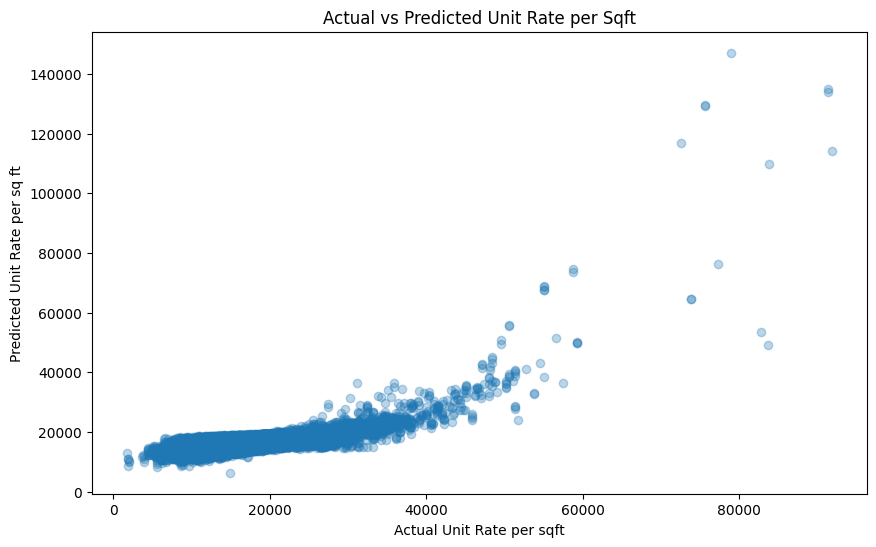

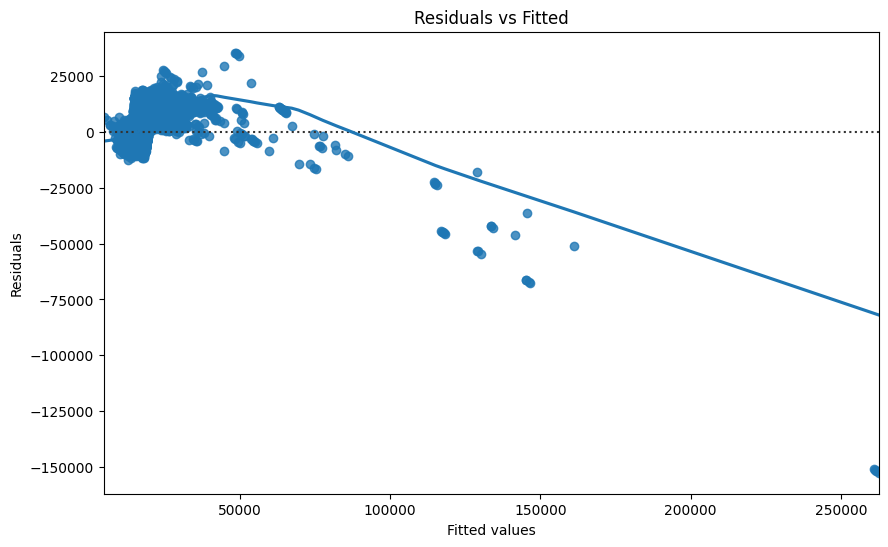

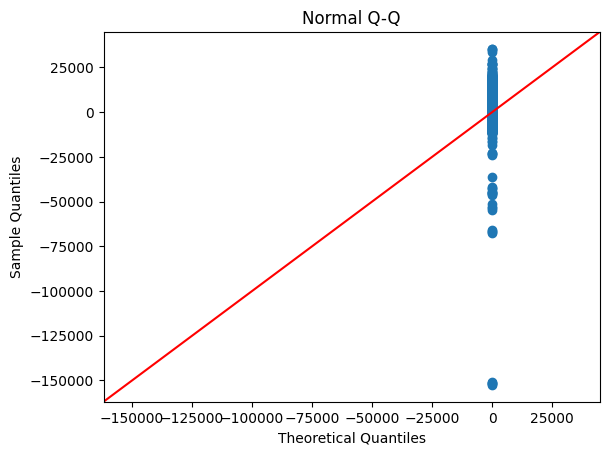

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Split the merged datataset
# Define independent variables (X) and dependent variable (y)
X = merged_dataset.drop(columns=['unit_rate', 'district','YearQuarter','Quarter' ]) # drop target and objects
y = merged_dataset['unit_rate']

# Split the dataset_dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform Regression Analysis
# Add a constant term to the independent variables
X_train_const = sm.add_constant(X_train)

# Fit the regression model
model = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the regression analysis
print(model.summary())

# Visualize the Results
# Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(sm.add_constant(X_test)), alpha=0.3)
plt.xlabel('Actual Unit Rate per sqft')
plt.ylabel('Predicted Unit Rate per sq ft')
plt.title('Actual vs Predicted Unit Rate per Sqft')
plt.show()

# Residuals plot
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(sm.add_constant(X_train)), y=y_train, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# QQ plot
sm.qqplot(model.resid, line='45')
plt.title('Normal Q-Q')
plt.show()

The OLS regression results indicate that the model explains 50.7% of the variance in the dependent variable (`unit_rate`). Significant predictors include `saleable_area(ft^2)`, `CG`, `CPI`, `MW`, `SD`, `SM`, and `district_encoded`, with p-values less than 0.05. The F-statistic (5268) and its p-value (0.00) confirm the model's overall significance. The Durbin-Watson statistic (1.988) suggests no significant autocorrelation. However, high values of the Omnibus, Jarque-Bera tests, and condition number imply potential issues with normality and multicollinearity.

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.151e+07
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:16:22   Log-Likelihood:                 64114.
No. Observations:               52896   AIC:                        -1.282e+05
Df Residuals:                   52880   BIC:                        -1.281e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.598e-05   2

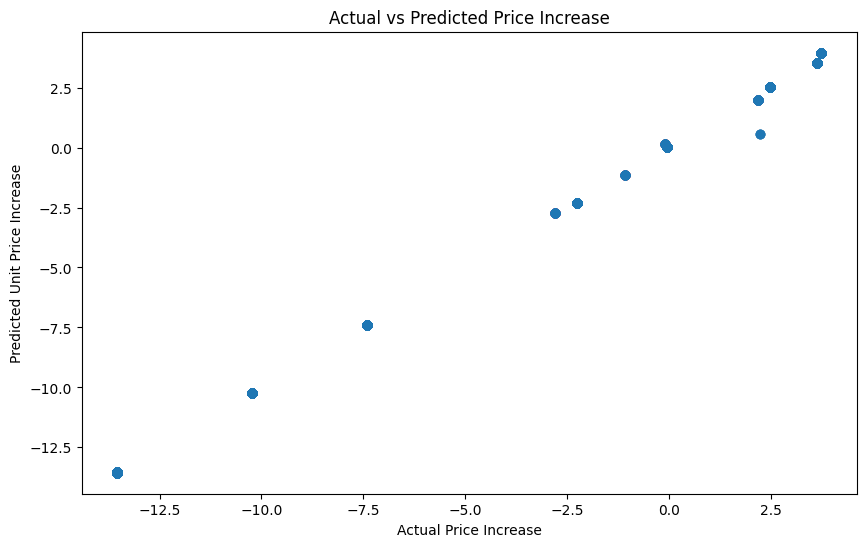

In [ ]:

# Split the merged datataset
# Define independent variables (X) and dependent variable (y)
X = merged_dataset.drop(columns=['PI', 'district','YearQuarter','Quarter' ]) # drop target and objects
y = merged_dataset['PI']

# Split the dataset_dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform Regression Analysis
# Add a constant term to the independent variables
X_train_const = sm.add_constant(X_train)

# Fit the regression model
model = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the regression analysis
print(model.summary())

# Visualize the Results
# Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(sm.add_constant(X_test)), alpha=0.3)
plt.xlabel('Actual Price Increase')
plt.ylabel('Predicted Unit Price Increase')
plt.title('Actual vs Predicted Price Increase')
plt.show()

# Residuals plot
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(sm.add_constant(X_train)), y=y_train, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# QQ plot
sm.qqplot(model.resid, line='45')
plt.title('Normal Q-Q')
plt.show()

# The OLS regression results, with an R-squared of 1.000, suggest a perfect fit, which often indicates overfitting or data issues. Significant predictors include `CG`, `CI`, `CPI`, `GDP`, `HS`, `IR`, `M3`, `MW`, `PG`, `SD`, `SM`, and `UR`, based on their p-values. The F-statistic (1.876e+07) and its p-value (0.00) confirm the model's overall significance. Diagnostic tests, such as Omnibus and Jarque-Bera, indicate potential issues with normality (Prob(JB) = 0.00). The high condition number suggests multicollinearity problems. The model is statistically significant.

                            OLS Regression Results                            
Dep. Variable:              new_price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:11:48   Log-Likelihood:            -9.1755e+05
No. Observations:               52896   AIC:                         1.835e+06
Df Residuals:                   52880   BIC:                         1.835e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -69.1080    

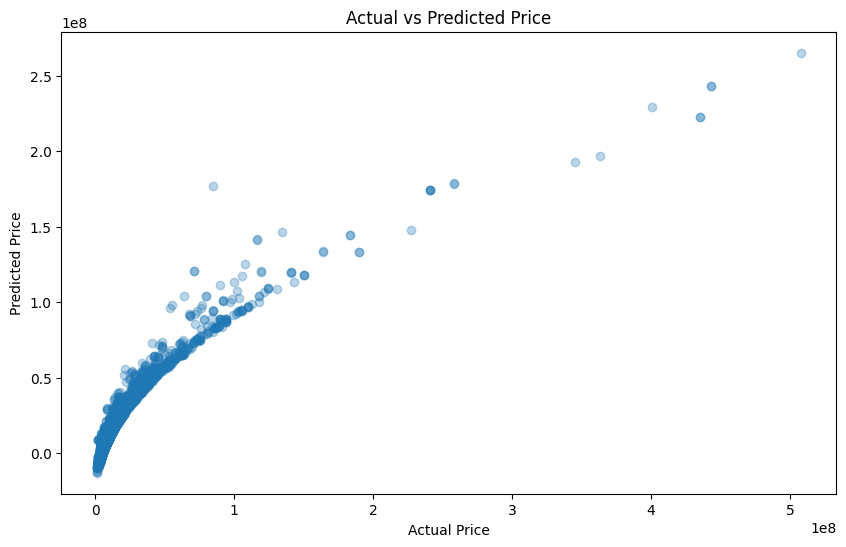

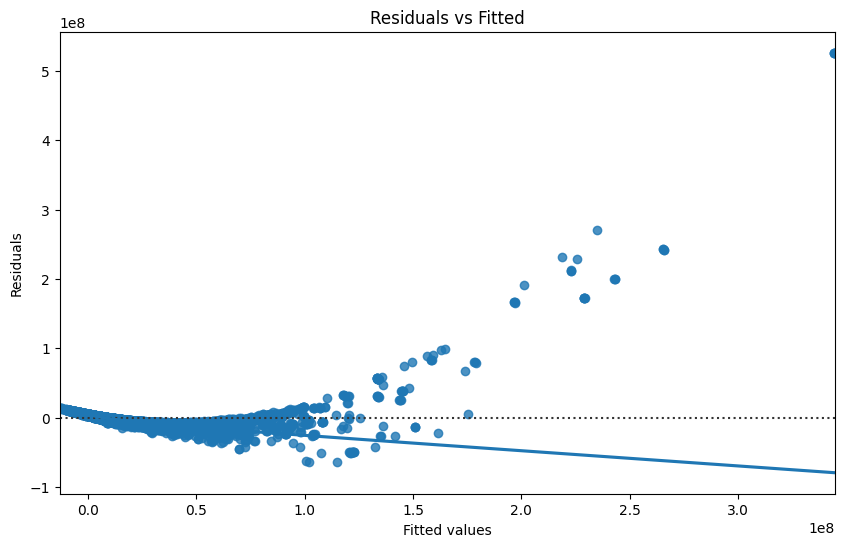

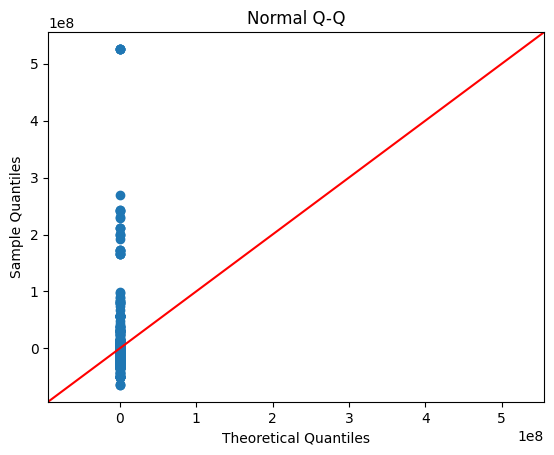

In [ ]:

# Split the merged datataset
# Define independent variables (X) and dependent variable (y)
X = merged_dataset.drop(columns=['new_price', 'district','YearQuarter','Quarter' ]) # drop target and objects
y = merged_dataset['new_price']

# Split the dataset_dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform Regression Analysis
# Add a constant term to the independent variables
X_train_const = sm.add_constant(X_train)

# Fit the regression model
model = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the regression analysis
print(model.summary())

# Visualize the Results
# Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(sm.add_constant(X_test)), alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# Residuals plot
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(sm.add_constant(X_train)), y=y_train, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# QQ plot
sm.qqplot(model.resid, line='45')
plt.title('Normal Q-Q')
plt.show()

The OLS regression results show that the model explains 76.4% of the variance in the dependent variable (`new_price`), with an adjusted R-squared of 0.763. Significant predictors include `saleable_area(ft^2)`, `unit_rate`, `IR`, `M3`, `SM`, and `UR`, indicated by p-values less than 0.05. The F-statistic (16550) and its p-value (0.00) confirm the model's overall significance. Diagnostic tests, such as Omnibus and Jarque-Bera, suggest issues with normality (Prob(JB) = 0.00). The Durbin-Watson statistic (2.000) indicates no significant autocorrelation.

# MultiCollinearity Issue

In my property data there is a strong correlation between unit rate, saleable area and price in that if you have two variables you can derive the third variable does this cause a problem in the machine learning

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is merged_database and target variable is 'new_price'
X = merged_dataset[['unit_rate', 'saleable_area(ft^2)']]
y = merged_dataset['new_price']

# Calculate VIF to check multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# If VIF is high, consider transformations or regularization

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)

# Evaluate Ridge Regression model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f'Ridge MSE: {ridge_mse}')
print(f'Ridge R2: {ridge_r2}')

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)

# Evaluate Lasso Regression model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print(f'Lasso MSE: {lasso_mse}')
print(f'Lasso R2: {lasso_r2}')

               feature       VIF
0            unit_rate  3.821119
1  saleable_area(ft^2)  3.821119
Ridge MSE: 38475217443585.42
Ridge R2: 0.7854413334424838
Lasso MSE: 38475217446110.23
Lasso R2: 0.785441333428404


The provided code performs Ridge and Lasso regression to predict `new_price` using `unit_rate` and `saleable_area(ft^2)` from the dataset. VIF values (~3.82) indicate moderate multicollinearity. Both Ridge and Lasso models yield high MSE (~3.85e13), suggesting poor prediction accuracy, but similar R2 scores (~0.785), indicating they explain about 78.54% of the variance in the target variable. This suggests regularization does not significantly impact performance with the current features and data. To improve the models, consider adding or transforming features, tuning hyperparameters, visualizing residuals, and ensuring data quality through thorough preprocessing.

# XGBoost

XGBoost (Extreme Gradient Boosting) machine learning algorithm based on gradient boosting, designed for speed and performance. It builds an ensemble of decision trees sequentially, where each tree corrects errors from the previous ones. Key features include regularization to prevent overfitting, handling missing values, and parallel processing for faster computation. XGBoost supports regression, classification, and ranking tasks, and is known for its scalability and accuracy. It is widely used in competitive machine learning and real-world applications due to its robust performance and flexibility.

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:

# List of dependent variables
dependent_vars = ['new_price', 'PI', 'unit_rate']

# Iterate over each dependent variable
for dep_var in dependent_vars:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = merged_dataset.drop(columns=[dep_var, 'district', 'YearQuarter', 'Quarter'])
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Set the parameters for XGBoost
    params = {
        'objective': 'reg:squarederror',
        'max_depth': 6,
        'eta': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'eval_metric': 'rmse'
    }

    # Train the XGBoost model
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Make predictions
    y_pred = model.predict(dtest)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error for {dep_var}: {mse}')
    print(f'R-squared for {dep_var}: {r2}')


Training model for new_price...

Mean Squared Error for new_price: 39065543461384.18
R-squared for new_price: 0.782149355602493

Training model for PI...

Mean Squared Error for PI: 2.220718673171497e-08
R-squared for PI: 0.99999999928141

Training model for unit_rate...

Mean Squared Error for unit_rate: 1168563.2368991212
R-squared for unit_rate: 0.970744135318707


The results for the XGBoost models trained on `new_price`, `PI`, and `unit_rate` indicate varying levels of performance. The model for `new_price` shows a high Mean Squared Error (MSE) of approximately 39 trillion, suggesting significant prediction errors, though its R-squared (R²) value of 0.782 indicates that it explains about 78.2% of the variability in the data—a reasonably good fit but with large errors.

Conversely, the model for `PI` performs exceptionally well, with an MSE of nearly zero (2.22e-08) and an R² value almost equal to 1 (0.999999999). This indicates near-perfect predictions and an excellent fit, explaining virtually all the variability in `PI`.

The `unit_rate` model also performs very well, with an MSE of around 1.17 million and an R² value of 0.971, indicating that it explains approximately 97.1% of the variability in the data. This suggests high prediction accuracy and a very good fit.

In summary, while the models for `PI` and `unit_rate` demonstrate excellent performance, the `new_price` model, despite a good fit, exhibits significant prediction errors. Further investigation and potential feature enhancement could improve the `new_price` model's accuracy.

In [ ]:
# Optimise the Hyperparamters
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# List of dependent variables
dependent_vars = ['new_price', 'PI', 'unit_rate']

# Hyperparameter grid for XGBoost
param_grid = {
    'max_depth': [3, 6, 9],
    'eta': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}

# Iterate over each dependent variable
for dep_var in dependent_vars:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = merged_dataset.drop(columns=[dep_var, 'district', 'YearQuarter', 'Quarter'])
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f'Best parameters for {dep_var}: {best_params}')

    # Train the model with the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error for {dep_var}: {mse}')
    print(f'R-squared for {dep_var}: {r2}')


Training model for new_price...

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for new_price: {'colsample_bytree': 1.0, 'eta': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error for new_price: 19633025606801.625
R-squared for new_price: 0.8905156078490929

Training model for PI...

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for PI: {'colsample_bytree': 1.0, 'eta': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error for PI: 3.420815714396918e-11
R-squared for PI: 0.9999999999988931

Training model for unit_rate...

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for unit_rate: {'colsample_bytree': 1.0, 'eta': 0.1, 'max_depth': 6, 'n_estimators': 50, 'subsample': 1.0}
Mean Squared Error for unit_rate: 1016849.1027960511
R-squared for unit_rate: 0.9745424134412817


#MLP

MLP (Multi-Layer Perceptron) models should be effective for forecasting `new_price`, `PI`, and `unit_rate` due to their ability to capture non-linear relationships and handle complex datasets. It offers flexibility and scalability, making them suitable for diverse forecasting tasks. Overfitting is a risk, necessitating regularization and cross-validation. Despite being less interpretable, MLPs provide robust, accurate predictions when properly managed, making them valuable for time series forecasting and other predictive tasks.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming merged_dataset is your DataFrame containing the data
# For demonstration, I'll create a dummy merged_dataset. Replace this with your actual DataFrame.
np.random.seed(42)
n_samples = 200
merged_dataset = pd.DataFrame({
    'new_price': np.random.rand(n_samples) * 1000,
    'PI': np.random.rand(n_samples) * 10,
    'unit_rate': np.random.rand(n_samples) * 50,
    'feature1': np.random.rand(n_samples),
    'feature2': np.random.rand(n_samples),
    'feature3': np.random.rand(n_samples),
    'district': np.random.choice(['A', 'B', 'C'], n_samples),
    'YearQuarter': np.random.choice(['2020Q1', '2020Q2', '2020Q3'], n_samples),
    'Quarter': np.random.choice(['Q1', 'Q2', 'Q3', 'Q4'], n_samples)
})

# List of dependent variables
dependent_vars = ['new_price', 'PI', 'unit_rate']

# Iterate over each dependent variable
for dep_var in dependent_vars:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = merged_dataset.drop(columns=[dep_var, 'district', 'YearQuarter', 'Quarter'])
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train MLP model
    mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)

    # Make predictions
    y_pred = mlp.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error for {dep_var}: {mse}')
    print(f'R-squared for {dep_var}: {r2}')

    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(f'Actual vs Predicted Values for {dep_var}')
    plt.xlabel('Sample Index')
    plt.ylabel(dep_var)
    plt.legend()
    plt.show()

The graph shows the actual vs. predicted values for the dependent variable `PI` using an MLP model. The blue line with dots represents the actual values, while the orange line with crosses represents the predicted values. The comparison between these lines illustrates the model's performance. Significant deviations between the lines suggest areas where the model's predictions do not align well with actual values, indicating potential issues with model accuracy or overfitting. The graph is accompanied by the squared error metrics, providing quantitative measures of prediction errors.